In [1]:
'''
python file used to create the get the metadata into a csv from each of
the .txt files in `data/Movie_Poster_Metadata` folder
'''
import pandas as pd
import os
import json
import re

def make_json_readable(s):
    '''
    method to change raw string from textfile json-compatible

    Parameters
    ==========
    `s`:
        complete string from text file

    Returns
    ==========
    updated json-formatted object with a comma delimiter and all values
    encapsulated by double quotes
    '''

    # replace new line-separated json-like objects with commma-separated objects
    s = s.replace("}\n{", "},{")

    # remove the rest of the new line characters
    s = s.replace("\n", "")

    # use regexp to find all appearances of this value corresponding to the _"id" key
    o = re.findall("ObjectId\(\"........................\"\)", s)

    for returns in o:
        # replace each appearance of this badly-formatted ObjectId("{}") value to
        # just the idea contained within the ObjectId parameter
        s = s.replace(returns, "\"" + returns[10:-2] + "\"")
    return s

def main():
    '''
    read in each textfile that contain the json-objects, create a DataFrame from
    those objects and save this DataFrame into a csv file
    '''
    path = "data/Movie_Poster_Metadata"

    destinations = [os.path.join(path, file) for file in os.listdir(path)]
    json_objects = []

    for dest in destinations:
        # some of these files have utf-8 encoding and others have
        # utf-16 encoding, so I just haced a solution using an unrecommended try/except
        try:
            with open(dest, encoding="utf-8") as f:
                jsons_string = f.read()
        except Exception:
            with open(dest, encoding="utf-16") as f:
                jsons_string = f.read()
        s = make_json_readable(jsons_string)
        # call json loads function on the properly formatted string
        dictionary_list = json.loads('[%s]'%s)

        json_objects.extend(dictionary_list)

    # create a DataFrame from this lsit of dictionaries (json objects) and save to csv
    pd.DataFrame(json_objects).to_csv("data/movies-metadata.csv")


if __name__ == "__main__":
    main()

In [5]:
import pandas as pd
df = pd.read_csv("data/movies-metadata.csv")
df.head(10)

,Unnamed: 0,_id,Language,Box_office,Country,Rated,imdbID,Awards,Poster,Director,...,Writer,imdbVotes,Runtime,Response,imdbRating,Title,Genre,Actors,Type,Metascore
0,0,56fb860e71a0651b0c306f55,English,"290,158,751",USA,PG,tt0080684,Won 1 Oscar. Another 15 wins & 18 nominations.,http://ia.media-imdb.com/images/M/MV5BMjE2MzQw...,Irvin Kershner,...,"Leigh Brackett (screenplay), Lawrence Kasdan (...","799,579",124 min,True,8.8,Star Wars: Episode V - The Empire Strikes Back,"Action, Adventure, Fantasy","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",movie,79.0
1,1,56fb860e71a0651b0c306f56,English,"101,500,000",USA,R,tt0081562,1 nomination.,http://ia.media-imdb.com/images/M/MV5BMTM4OTI3...,Sidney Poitier,...,Bruce Jay Friedman,"17,705",111 min,True,6.8,Stir Crazy,"Comedy, Crime","Gene Wilder, Richard Pryor, Georg Stanford Bro...",movie,50.0
2,2,56fb860e71a0651b0c306f57,English,"83,400,000",USA,PG,tt0080339,Nominated for 1 Golden Globe. Another 2 wins &...,http://ia.media-imdb.com/images/M/MV5BNDU2MjE4...,"Jim Abrahams, David Zucker, Jerry Zucker",...,"Jim Abrahams (written for the screen by), Davi...","154,994",88 min,True,7.8,Airplane!,Comedy,"Kareem Abdul-Jabbar, Lloyd Bridges, Peter Grav...",movie,NaN
3,3,56fb860e71a0651b0c306f58,English,NaN,USA,PG,tt0080377,1 win.,http://ia.media-imdb.com/images/M/MV5BMTc5MTc5...,Buddy Van Horn,...,"Jeremy Joe Kronsberg (characters), Stanford Sh...","12,639",116 min,True,6.0,Any Which Way You Can,"Action, Comedy","Clint Eastwood, Sondra Locke, Geoffrey Lewis, ...",movie,NaN
4,4,56fb860e71a0651b0c306f59,English,"69,800,000",USA,R,tt0081375,Nominated for 3 Oscars. Another 1 win & 3 nomi...,http://ia.media-imdb.com/images/M/MV5BMjIyNjkx...,Howard Zieff,...,"Nancy Meyers, Charles Shyer, Harvey Miller","17,591",109 min,True,6.1,Private Benjamin,"Comedy, War","Goldie Hawn, Eileen Brennan, Armand Assante, R...",movie,NaN
5,5,56fb860e71a0651b0c306f5a,English,"79,900,000",USA,PG,tt0080549,Won 1 Oscar. Another 8 wins & 13 nominations.,http://ia.media-imdb.com/images/M/MV5BMTkwMjUx...,Michael Apted,...,"Thomas Rickman (screenplay), Loretta Lynn (aut...","12,692",124 min,True,7.5,Coal Miner's Daughter,"Biography, Drama, Music","Sissy Spacek, Tommy Lee Jones, Levon Helm, Phy...",movie,NaN
6,6,56fb860e71a0651b0c306f5b,"English, Spanish","66,100,000",USA,PG,tt0081529,1 win & 4 nominations.,http://ia.media-imdb.com/images/M/MV5BMTc3MjUw...,Hal Needham,...,"Hal Needham (characters created by), Robert L....","10,818",100 min,True,5.1,Smokey and the Bandit II,"Action, Comedy","Burt Reynolds, Jackie Gleason, Jerry Reed, Dom...",movie,NaN
7,7,56fb860e71a0651b0c306f5c,English,NaN,USA,R,tt0080453,Nominated for 1 Oscar. Another 3 wins & 7 nomi...,http://ia.media-imdb.com/images/M/MV5BMTQwNTM5...,Randal Kleiser,...,"Henry De Vere Stacpoole (novel), Douglas Day S...","48,868",104 min,True,5.7,The Blue Lagoon,"Adventure, Drama, Romance","Brooke Shields, Christopher Atkins, Leo McKern...",movie,NaN
8,8,56fb860e71a0651b0c306f5d,English,"54,200,000",USA,R,tt0080455,1 win.,http://ia.media-imdb.com/images/M/MV5BMTM1Mjk3...,John Landis,...,"Dan Aykroyd, John Landis","138,196",133 min,True,7.9,The Blues Brothers,"Action, Comedy, Crime","John Belushi, Dan Aykroyd, James Brown, Cab Ca...",movie,NaN
9,9,56fb860e71a0651b0c306f5e,English,"54,800,000",USA,R,tt0081283,Won 4 Oscars. Another 15 wins & 14 nominations.,http://ia.media-imdb.com/images/M/MV5BNTQwNTc4...,Robert Redford,...,"Judith Guest (novel), Alvin Sargent (screenplay)","34,021",124 min,True,7.8,Ordinary People,Drama,"Donald Sutherland, Mary Tyler Moore, Judd Hirs...",movie,85.0


In [7]:
#get where the poster is null
df[df["Poster"].isnull()]

,Unnamed: 0,_id,Language,Box_office,Country,Rated,imdbID,Awards,Poster,Director,...,Writer,imdbVotes,Runtime,Response,imdbRating,Title,Genre,Actors,Type,Metascore
87,87,56fb860e71a0651b0c306fac,English,NaN,USA,PG,tt0081753,2 nominations.,NaN,Larry Peerce,...,"Hollis Hodges (novel), Peter Stone",179,105 min,True,6.5,Why Would I Lie?,"Comedy, Drama","Treat Williams, Lisa Eichhorn, Gabriel Macht, ...",movie,NaN
145,145,56fb882271a0651a3c24f7e3,English,NaN,USA,NaN,tt1614571,NaN,NaN,NaN,...,NaN,NaN,60 min,True,NaN,Atlantic City Alive,Musical,Bob Eubanks,series,NaN
171,171,56fb882271a0651a3c24f7fd,English,NaN,Canada,R,tt0082440,NaN,NaN,Les Rose,...,"Susan Scranton (story), Dick Wolf (screenplay)...",269,94 min,True,2.6,Gas,Comedy,"Susan Anspach, Howie Mandel, Sterling Hayden, ...",movie,NaN
185,185,56fb882271a0651a3c24f80b,English,NaN,USA,PG,tt0082145,1 win.,NaN,Lamont Johnson,...,"David Eyre, Robert Ward (novel), Robert Ward (...",326,97 min,True,6.1,Cattle Annie and Little Britches,"Drama, Western","Scott Glenn, Diane Lane, Burt Lancaster, Amand...",movie,NaN
188,188,56fb882271a0651a3c24f80e,English,NaN,Canada,NaN,tt0082606,NaN,NaN,Christopher Chapman,...,Robert Logan,32,94 min,True,5.9,Kelly,Drama,"Robert Logan, Twyla-Dawn Vokins, George Clutes...",movie,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,8740,570780c771a0650b20736c5a,English,NaN,USA,NaN,tt5120418,NaN,NaN,Guy Noland,...,NaN,NaN,NaN,True,NaN,The Salvation Army Training School: Zimbabwe,"Short, Biography",NaN,movie,NaN
8754,8754,570780c771a0650b20736c68,English,NaN,Canada,NaN,tt3237942,NaN,NaN,Roger Boyer,...,Roger Boyer,NaN,NaN,True,NaN,Dark Forest,Horror,"Jalin Desloges, Jesse Laing, Matthew Stefanson...",movie,NaN
8757,8757,570780c771a0650b20736c6b,English,"1,056",USA,NaN,tt4797082,NaN,NaN,Muffie Meyer,...,NaN,NaN,64 min,True,NaN,Making Rounds,Documentary,NaN,movie,NaN
8758,8758,570780c771a0650b20736c6c,English,NaN,USA,NaN,tt5350540,NaN,NaN,NaN,...,NaN,NaN,8 min,True,NaN,"Skin Trade: Behind the Action, Fighting You Ca...","Documentary, Short","Craig Baumgarten, Tony Jaa, Dolph Lundgren, Ro...",movie,NaN


In [23]:
import pandas as pd
#drop where the poster is null
df = pd.read_csv("data/movies-metadata.csv")

df = df.dropna(subset=["Poster"])
# drop wher genre is null
df = df.dropna(subset=["Genre"])


In [24]:
#keep only imdbID and genre
df = df[["imdbID", "Genre"]]
df.head(10)

,imdbID,Genre
0,tt0080684,"Action, Adventure, Fantasy"
1,tt0081562,"Comedy, Crime"
2,tt0080339,Comedy
3,tt0080377,"Action, Comedy"
4,tt0081375,"Comedy, War"
5,tt0080549,"Biography, Drama, Music"
6,tt0081529,"Action, Comedy"
7,tt0080453,"Adventure, Drama, Romance"
8,tt0080455,"Action, Comedy, Crime"
9,tt0081283,Drama


In [25]:
df["Genre"] = ", " + df["Genre"]  # Prepend a comma to each genre string
df = df.join(df["Genre"].str.get_dummies(","))
df.head(10)

,imdbID,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0080684,", Action, Adventure, Fantasy",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0081562,", Comedy, Crime",0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0080339,", Comedy",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0080377,", Action, Comedy",1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0081375,", Comedy, War",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,tt0080549,", Biography, Drama, Music",0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,tt0081529,", Action, Comedy",1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,tt0080453,", Adventure, Drama, Romance",0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,tt0080455,", Action, Comedy, Crime",1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0081283,", Drama",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


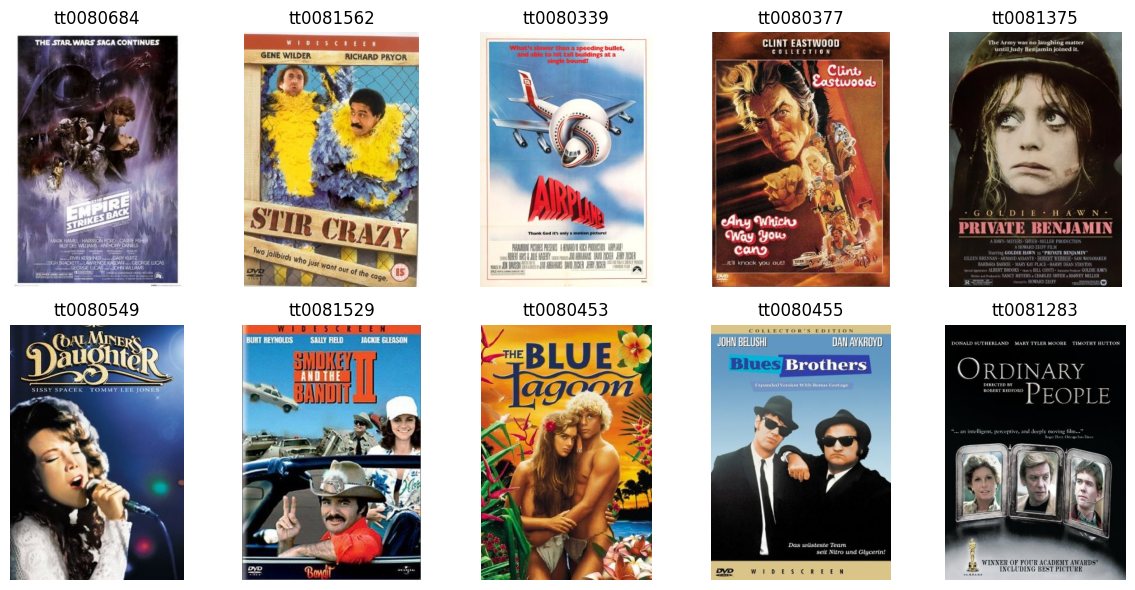

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    img = mpimg.imread("data/images/" + df.iloc[i]["imdbID"] + ".jpg")
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(df.iloc[i]["imdbID"])

plt.tight_layout()
plt.show()


In [26]:
#save to csv
df.to_csv("data/genre.csv")

In [31]:
# list all image sizes
import os
import pandas as pd
from PIL import Image

path = "data/images"
sizes = []
for file in os.listdir(path):
    img = Image.open(os.path.join(path, file))
    sizes.append(img.size)

df = pd.DataFrame(sizes, columns=["width", "height"])

# save to csv
df.to_csv("data/image_sizes.csv")

In [34]:
#show all unique sizes
df = pd.read_csv("data/image_sizes.csv")
df.drop_duplicates()
df.values

array([[   0,  216,  319],
       [   1,  300,  428],
       [   2,  300,  444],
       ...,
       [8049,  300,  169],
       [8050,  300,  450],
       [8051,  300,  173]], dtype=int64)

In [35]:
import os
from PIL import Image

# Path to the folder containing the original images
input_folder = "data/images/"

# Path to the folder where resized images will be saved
output_folder = "data/clean_images/"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get the list of files in the input folder
files = os.listdir(input_folder)

for filename in files:
    # Load the original image
    image_path = os.path.join(input_folder, filename)
    image = Image.open(image_path)

    # Resize the image while maintaining the aspect ratio
    new_width = 300
    new_height = int(new_width * (450 / 300))
    resized_image = image.resize((new_width, new_height))

    # Check if the image is in portrait orientation
    if resized_image.height > resized_image.width:
        # Save the resized image with the original filename in the output folder
        output_path = os.path.join(output_folder, filename)
        resized_image.save(output_path)

print("Image resizing and saving complete.")


Image resizing and saving complete.


In [36]:
# list all image sizes
import os
import pandas as pd
from PIL import Image

path = "data/clean_images"
sizes = []
for file in os.listdir(path):
    img = Image.open(os.path.join(path, file))
    sizes.append(img.size)

df = pd.DataFrame(sizes, columns=["width", "height"])

df.drop_duplicates()
df.values

array([[300, 450],
       [300, 450],
       [300, 450],
       ...,
       [300, 450],
       [300, 450],
       [300, 450]], dtype=int64)

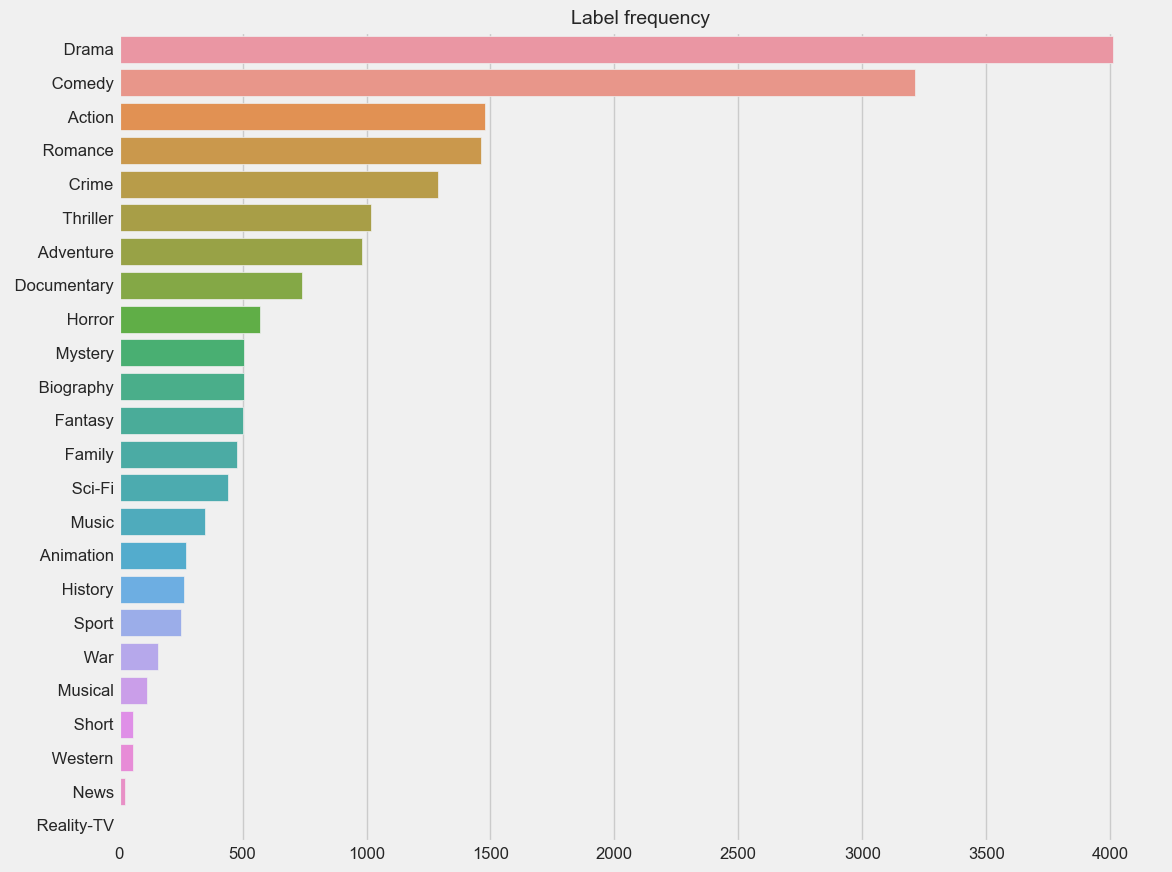

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

df = pd.read_csv("data/genre.csv")

# Get label frequencies in descending order
label_freq = df['Genre'].apply(lambda s: str(s).split(',')).explode().value_counts().sort_values(ascending=False)

# drop the first value, which is the empty string
label_freq = label_freq.drop(label_freq.index[0])

# Bar plot
style.use("fivethirtyeight")
plt.figure(figsize=(12,10))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.index)
plt.title("Label frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()